In [1]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)
x4 = np.random.rand(100)
noise = np.random.rand(100)
y = x1 + x2**2 + x3*x4

# Create a DataFrame
X_train = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'noise': noise})
X_train

,x1,x2,x3,x4,noise
0,0.796460,0.366006,0.647569,0.932992,0.956790
1,0.176940,0.382954,0.747207,0.489061,0.298800
2,0.734335,0.298720,0.916859,0.541011,0.916237
3,0.247635,0.029687,0.264558,0.249152,0.299213
4,0.706530,0.988065,0.649198,0.272427,0.511131
...,...,...,...,...,...
95,0.783796,0.154739,0.770599,0.743436,0.123058
96,0.987370,0.431251,0.976951,0.147861,0.509604
97,0.584828,0.691516,0.658312,0.924636,0.172359
98,0.077025,0.585288,0.619095,0.452633,0.311126


In [3]:
target_train = pd.Series(x1 + x2**2 + x3*x4)
target_train.name = 'y'
target_train

0     1.534597
1     0.689025
2     1.319599
3     0.314432
4     1.859660
        ...   
95    1.380631
96    1.317800
97    1.671722
98    0.699810
99    1.356875
Name: y, Length: 100, dtype: float64

In [4]:
tree_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state = 100)
tree_model.fit(X=X_train, y=target_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, random_state=100)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.529\nabsolute_error = 0.374\nsamples = 100\nvalue = 1.038'),
 Text(0.25, 0.5, 'x[1] <= 0.786\nabsolute_error = 0.264\nsamples = 51\nvalue = 0.758'),
 Text(0.125, 0.16666666666666666, 'absolute_error = 0.207\nsamples = 39\nvalue = 0.685'),
 Text(0.375, 0.16666666666666666, 'absolute_error = 0.154\nsamples = 12\nvalue = 1.143'),
 Text(0.75, 0.5, 'x[1] <= 0.826\nabsolute_error = 0.311\nsamples = 49\nvalue = 1.32'),
 Text(0.625, 0.16666666666666666, 'absolute_error = 0.225\nsamples = 39\nvalue = 1.243'),
 Text(0.875, 0.16666666666666666, 'absolute_error = 0.226\nsamples = 10\nvalue = 1.941')]

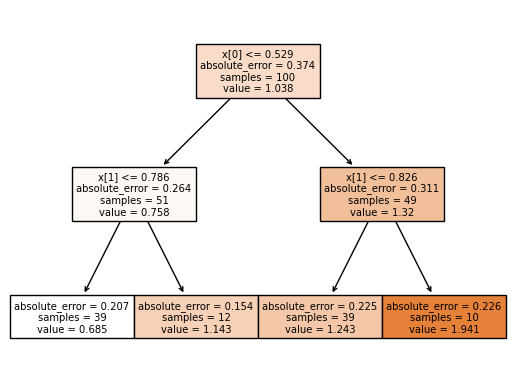

In [5]:
plot_tree(tree_model, filled=True)

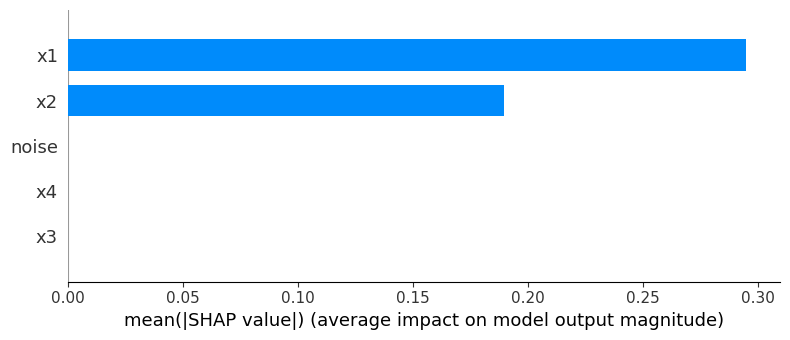

In [6]:
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

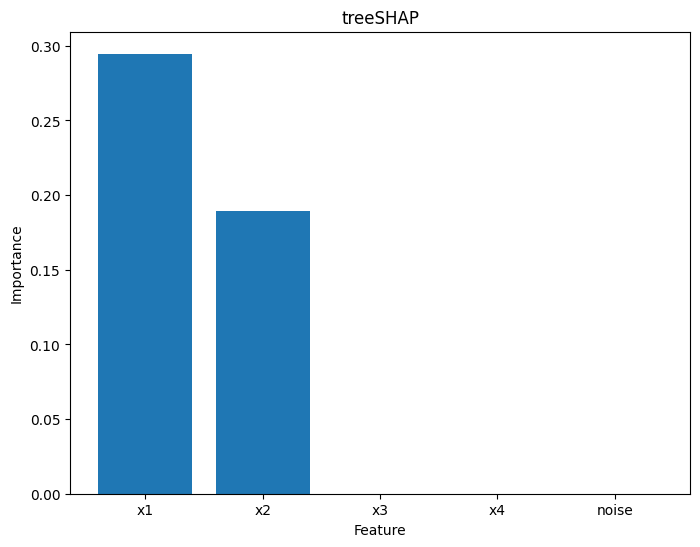

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(X_train.columns[:], np.mean(np.abs(shap_values), axis=0))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("treeSHAP")
plt.savefig("figs/treeSHAP.png", format='png')
plt.show()